<a href="https://colab.research.google.com/github/vanryuji/aws/blob/master/sdk/cloudwatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Refer

https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/cloudwatch.html#CloudWatch.Client.get_metric_widget_image
https://docs.aws.amazon.com/AmazonCloudWatch/latest/APIReference/CloudWatch-Metric-Widget-Structure.html
https://stackoverflow.com/questions/53387313/how-to-use-aws-cloudwatch-get-metric-widget-image

# Prepare

In [0]:
import boto3
from PIL import Image
from IPython.display import display

In [1]:
# For security reason, you must define access key and secret key as environment variables
# https://boto3.amazonaws.com/v1/documentation/api/latest/guide/configuration.html#environment-variables

%env AWS_ACCESS_KEY_ID=<your_AWS_ACCESS_KEY_ID>
%env AWS_SECRET_ACCESS_KEY=<your_AWS_SECRET_ACCESS_KEY>
!echo $AWS_ACCESS_KEY_ID
!echo $AWS_SECRET_ACCESS_KEY

env: AWS_ACCESS_KEY_ID=<your_AWS_ACCESS_KEY_ID>
env: AWS_SECRET_ACCESS_KEY=<your_AWS_SECRET_ACCESS_KEY>
<your_AWS_ACCESS_KEY_ID>
<your_AWS_SECRET_ACCESS_KEY>


In [0]:
client = boto3.client('cloudwatch', region_name='ap-northeast-2')

# list_dashboards()

In [0]:
client.list_dashboards(
    DashboardNamePrefix='Mobile'
)

{'DashboardEntries': [{'DashboardArn': 'arn:aws:cloudwatch::436582069789:dashboard/Mobile-Notification-Metric',
   'DashboardName': 'Mobile-Notification-Metric',
   'LastModified': datetime.datetime(2017, 6, 2, 12, 5, 11, tzinfo=tzlocal()),
   'Size': 1738}],
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '600',
   'content-type': 'text/xml',
   'date': 'Thu, 26 Sep 2019 04:40:44 GMT',
   'x-amzn-requestid': '3da26a80-6b13-4925-834a-4d516f8d2700'},
  'HTTPStatusCode': 200,
  'RequestId': '3da26a80-6b13-4925-834a-4d516f8d2700',
  'RetryAttempts': 0}}

# get_dashboard()

In [0]:
client.get_dashboard(
    DashboardName='Mobile-Notification-Metric'
)

{'DashboardArn': 'arn:aws:cloudwatch::436582069789:dashboard/Mobile-Notification-Metric',
 'DashboardBody': '{"widgets":[{"type":"metric","x":0,"y":0,"width":21,"height":6,"properties":{"view":"timeSeries","stacked":false,"metrics":[["AWS/Logs","IncomingLogEvents","LogGroupName","sns/ap-northeast-2/436582069789/app/GCM/GlowPickAOS",{"period":900,"stat":"Sum","region":"ap-northeast-2","yAxis":"left"}],["AWS/Logs","IncomingLogEvents","LogGroupName","sns/ap-northeast-2/436582069789/app/APNS/GlowPickIOS",{"period":900,"stat":"Sum","region":"ap-northeast-2","yAxis":"left"}],["AWS/Logs","IncomingLogEvents","LogGroupName","sns/ap-northeast-2/436582069789/app/APNS/GlowPickIOS/Failure",{"period":900,"stat":"Sum"}],["AWS/Logs","IncomingLogEvents","LogGroupName","sns/ap-northeast-2/436582069789/app/GCM/GlowPickAOS/Failure",{"period":900,"stat":"Sum"}]],"region":"ap-northeast-2","title":"전체 푸쉬 성공,실패 카운트(일단위)","period":300}},{"type":"metric","x":0,"y":6,"width":21,"height":6,"properties":{"view":"t

# get_metric_widget_image()

In [0]:
result_ios = client.get_metric_widget_image(
    MetricWidget='''{
        "metrics": [
            ["AWS/SNS", "NumberOfMessagesPublished", "Platform", "APNS", "Application", "GlowPickIOS", {"stat": "Sum"}],
            ["AWS/SNS", "NumberOfNotificationsDelivered", "Platform", "APNS", "Application", "GlowPickIOS", {"stat": "Sum"}],
            ["AWS/SNS", "NumberOfNotificationsFailed", "Platform", "APNS", "Application", "GlowPickIOS", {"stat": "Sum"}]
        ],
        "title": "GlowPickIOS",
        "start": "2019-09-18T00:00:00.000Z",
        "width": 1200,
        "height": 300
    }'''
)
result_ios

{'MetricWidgetImage': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xb0\x00\x00\x01,\x10\x06\x00\x00\x00\x83-\x96\x13\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x06bKGD\xff\xff\xff\xff\xff\xff\tX\xf7\xdc\x00\x00\x00\tpHYs\x00\x00\x00`\x00\x00\x00`\x00\xf0kB\xcf\x00\x00\x00\x07tIME\x07\xe3\t\x1a\x08(\x04:\x93-\r\x00\x00RHIDATx\xda\xed\xddg\x9c\x1c\xd5\x9d0j\xdf\xbd\x1f\xee\xdd\xe4\r\xef\xfev\xf7\xb57\xdc\xbdww\xdfwm\x03\xeb\x84\xb1q\\\x83\x11\xd1\x04\x1b\x93M\xb0\t\x06\x0c\x12\xc9\t\x8d$r4A\xd2\xcc(\x13$$\x10\x18\x13d\xb2\x00c4Jd\x93\x83D\xce\x12\x92\xc8\xe1\\\x9d\xd3>[CO\xd7t\x98V\x9c\xe7\x99\x0f\xd5\xd3\xddU]\xe1_\xe7\x9c:\xf5\xaf\xaa\x8f\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00Z\xf2\x11\xab\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa05\x12\xb0\x00\x00\x00\x00\x00\x00\x00\x00\x00Z$\x01\x0b\x00\x00\x00\x00\x00\x00\x00\x00\xa0E\x12\xb0\x00

In [0]:
result_aos = client.get_metric_widget_image(
    MetricWidget='''{
        "metrics": [
            ["AWS/SNS", "NumberOfMessagesPublished", "Platform", "GCM", "Application", "GlowPickAOS", {"stat": "Sum"}],
            ["AWS/SNS", "NumberOfNotificationsDelivered", "Platform", "GCM", "Application", "GlowPickAOS", {"stat": "Sum"}],
            ["AWS/SNS", "NumberOfNotificationsFailed", "Platform", "GCM", "Application", "GlowPickAOS", {"stat": "Sum"}]
        ],
        "title": "GlowPickAOS",
        "start": "2019-09-18T00:00:00.000Z",
        "width": 1200,
        "height": 300
    }'''

)
result_aos

{'MetricWidgetImage': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xb0\x00\x00\x01,\x10\x06\x00\x00\x00\x83-\x96\x13\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x06bKGD\xff\xff\xff\xff\xff\xff\tX\xf7\xdc\x00\x00\x00\tpHYs\x00\x00\x00`\x00\x00\x00`\x00\xf0kB\xcf\x00\x00\x00\x07tIME\x07\xe3\t\x1a\x08(\rCO\x95\xa9\x00\x00ycIDATx\xda\xed\xfdy\x80T\xd5\x9d0\xfc\xe7\xf7>\x7f\xbc\xef<\xcf\xfbL\x9e\xcc\xe4\x9d-\x93\x99\xc9,\x99\x99,\x1a\x13\xd7D\'\xabq\x8b\x89Y4\x13\x8d\xd9\x971\x9aE\xb3\'\x13\xba\x01e\x13\x14\x17T\x04AVA\xc5]\xc4\x15W\xba\x9bEP\x14P\x16\x05\x05EE\t\x82\xbb\x9e\x1f\xe7\x14\xc7\x0b\xd5]Tw\xd1\xd8\xd5]\x9fO\xffq\xab\xbb\xabn\xdd{\xee\xb9\xf7l\xdf{\xee\xdb\x02\x00\x00\x00\x00\x00\x00\x00\x00\x005y\x9b$\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa8\x8d\x00,\x00\x00\x00\x00\x00\x00\x00\x00\x80\x1a\t\xc0\x02\x00\x00\x00\x00\x00\x00\x00

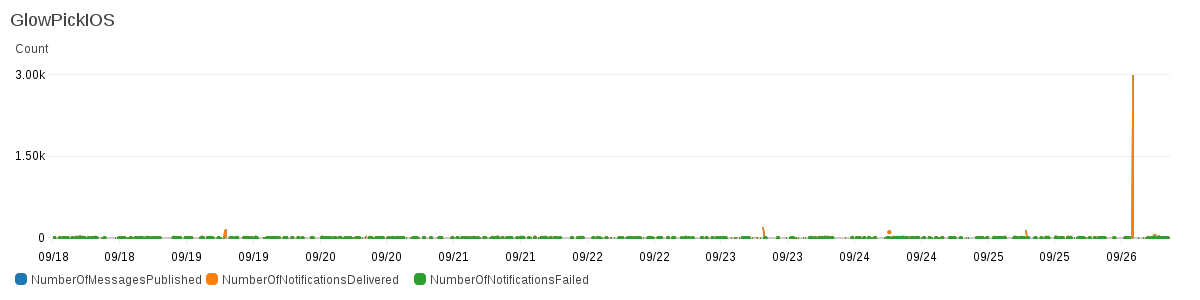

In [0]:
file_name = 'test.png'
with open(file_name, "wb") as f:
    f.write(result_ios['MetricWidgetImage'])
display(Image.open(file_name))

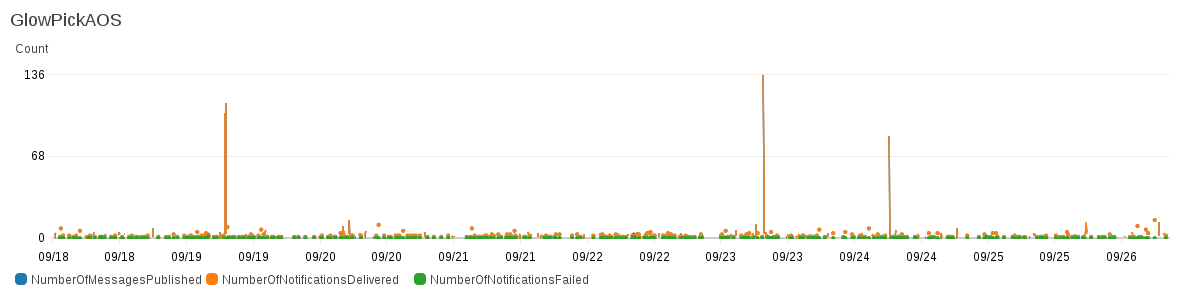

In [0]:
file_name = 'test.png'
with open(file_name, "wb") as f:
    f.write(result_aos['MetricWidgetImage'])
display(Image.open(file_name))